In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))
    
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


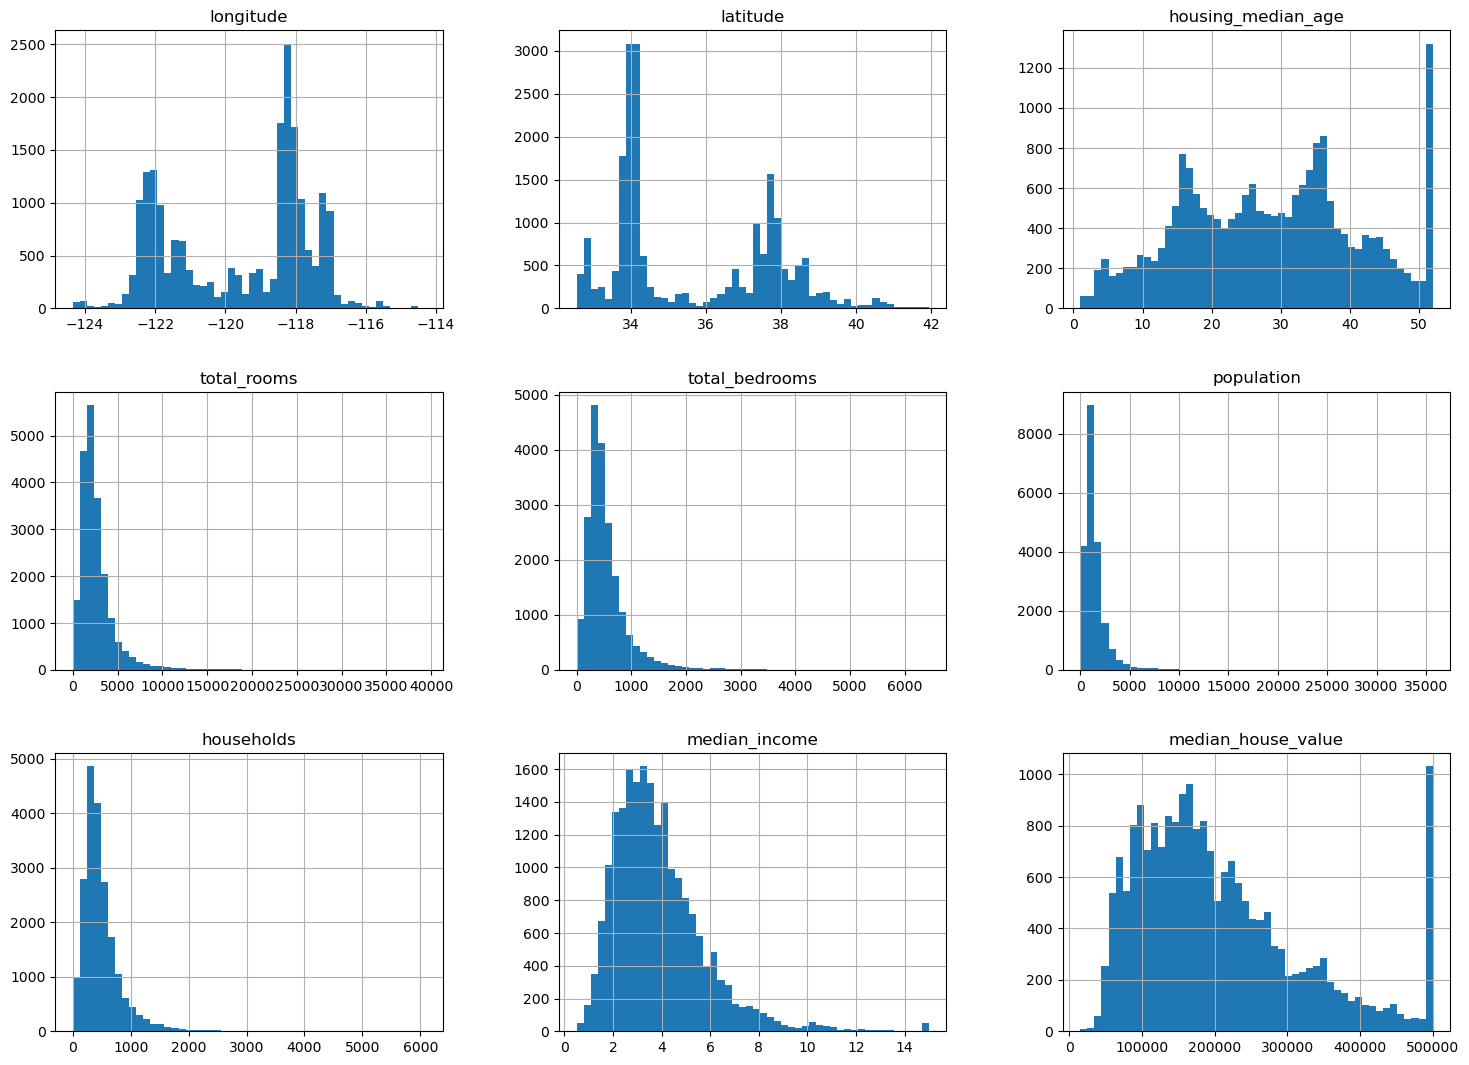

In [7]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(18, 13))
plt.show();

In [8]:
import numpy as np


In [9]:
def shuffle_and_split_data(data, test_ratio):   
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

In [11]:
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12909,-121.90,37.29,26.0,1797.0,244.0,626.0,244.0,7.8575,424600.0,<1H OCEAN
4709,-118.21,34.05,28.0,950.0,357.0,1485.0,345.0,1.9271,136400.0,<1H OCEAN
8146,-118.95,34.18,25.0,2237.0,331.0,1121.0,365.0,6.0994,254900.0,<1H OCEAN
7941,-118.07,33.73,13.0,1822.0,313.0,643.0,303.0,9.8346,401700.0,NEAR OCEAN
15215,-121.92,37.33,52.0,2962.0,557.0,1215.0,506.0,4.7768,301100.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15493,-117.70,34.08,33.0,4674.0,791.0,2769.0,784.0,4.1448,137300.0,INLAND
2965,-117.23,32.85,25.0,4229.0,601.0,1634.0,574.0,6.3955,316700.0,NEAR OCEAN
7605,-122.04,37.99,36.0,2765.0,495.0,1478.0,441.0,4.1250,136200.0,NEAR BAY
6055,-120.90,39.93,23.0,2679.0,546.0,1424.0,529.0,2.8812,81900.0,INLAND


In [12]:
test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10889,-121.34,38.61,11.0,1716.0,404.0,722.0,415.0,2.0926,166100.0,INLAND
997,-120.84,37.51,20.0,1901.0,313.0,1258.0,320.0,3.8958,126800.0,INLAND
20177,-117.14,32.75,29.0,1961.0,565.0,1002.0,569.0,2.2813,118100.0,NEAR OCEAN
736,-117.26,34.11,33.0,1210.0,288.0,850.0,238.0,1.2171,59300.0,INLAND
5368,-123.23,39.77,25.0,2075.0,435.0,991.0,377.0,1.2281,60300.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
12403,-121.75,36.91,52.0,1211.0,447.0,1102.0,392.0,1.6875,161400.0,<1H OCEAN
11734,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0,NEAR BAY
10733,-117.09,32.66,38.0,833.0,206.0,570.0,182.0,1.8333,127100.0,NEAR OCEAN
7555,-121.37,38.57,16.0,3895.0,896.0,1762.0,855.0,2.6635,135800.0,INLAND


In [13]:
from zlib import crc32


In [14]:
def is_id_in_test_set(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

In [15]:
def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda x : is_id_in_test_set(x , test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
# Using the row index as ID
housing_with_ID = housing.reset_index()
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "index")

In [17]:
# Using column value to create uniue IDs
housing_with_ID['id'] = housing['longitude'] * 1000 + housing['latitude']
train_set, test_set = split_data_with_id_hash(housing_with_ID, 0.2, "id")

In [18]:
housing_with_ID

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,-122192.12
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,-122182.14
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,-122202.15
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,-122212.15
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,-122212.15
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,-121050.52
20636,20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,-121170.51
20637,20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,-121180.57
20638,20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,-121280.57


In [19]:
# Can also use from Sklearn
from sklearn.model_selection import train_test_split

In [20]:
train_set, test_set = train_test_split(housing , test_size = 0.2, random_state=42)

* **Taking a look at the histogram for median income, most median income values are saturated from $15000 to $60000 but some go far beyond 6.**
* **It is important to have sufficient number of instances in your dataset from each stratum or its estimate of importance will be biased.**

In [21]:
housing['income_cat'] = pd.cut(housing['median_income'], bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels = [1,2,3,4,5])


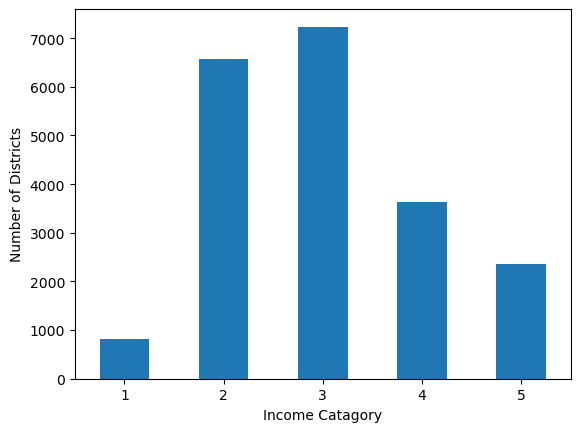

In [22]:
housing['income_cat'].value_counts().sort_index().plot.bar(rot = 0)
plt.xlabel("Income Catagory")
plt.ylabel("Number of Districts")
plt.show()

* **Stratified Sampling using Scikit-learn**

In [23]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size = 0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]): 
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [24]:
# shorter way to get train test split

strat_train_set, strat_test_set = train_test_split(housing, test_size = 0.2, stratify = housing["income_cat"], random_state=42)

In [25]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

* **Dropping 'income_cat" column as it not necessary anymore** 

In [26]:
for set_ in (strat_test_set, strat_train_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [27]:
housing = strat_train_set.copy()

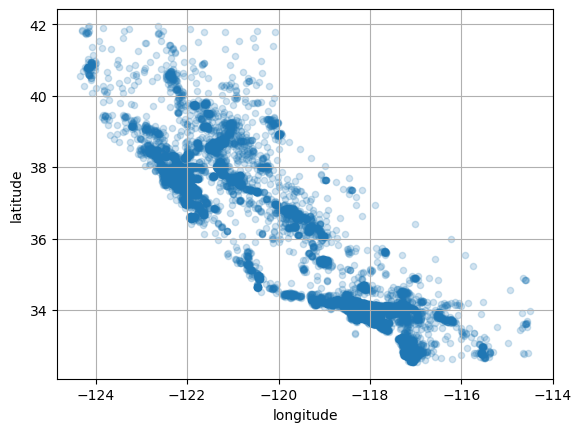

In [28]:
housing.plot(kind = 'scatter' , x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
plt.show();

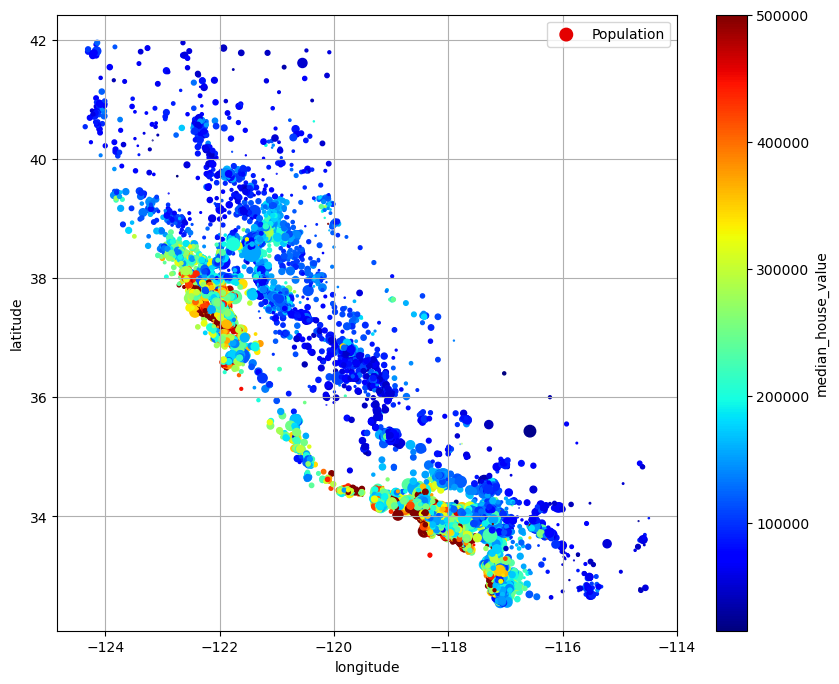

In [29]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', grid = True,
             s = housing['population']/100 , label = "Population", c = 'median_house_value', cmap = 'jet',
             colorbar = True,sharex = False,figsize = (10, 8))
plt.show();

In [30]:
corr_matrix = housing.corr(numeric_only=True)

In [31]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

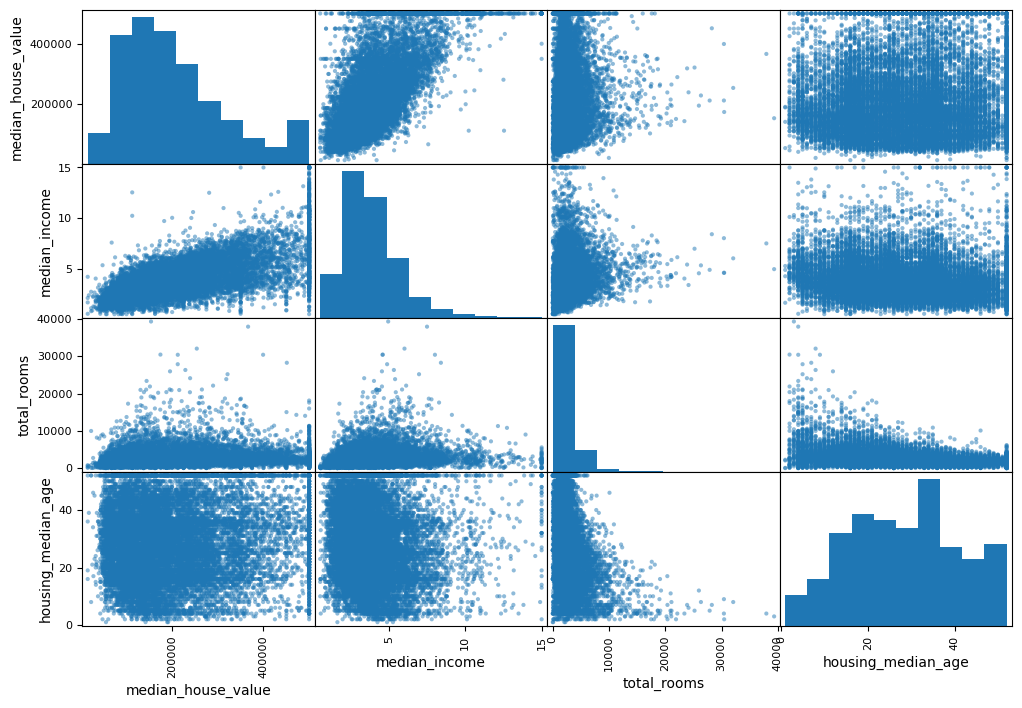

1

In [32]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show();1

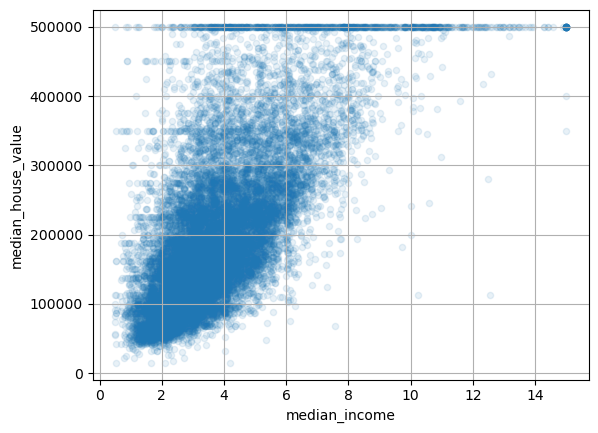

In [33]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

In [34]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]


In [35]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64